<a href="https://colab.research.google.com/github/mjdkarem/Mental-Health-Dashboard/blob/main/EDA_Pakistan_Largest_Ecommerce_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Pakistan Largest Ecommerce Dataset.csv to Pakistan Largest Ecommerce Dataset.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv", low_memory=False)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Show columns to confirm
print("Columns:", df.columns.tolist())

# Drop columns with >50% missing
df.dropna(axis=1, thresh=len(df) * 0.5, inplace=True)

# Clean and convert key columns
df.dropna(subset=['increment_id', 'customer_id', 'grand_total'], inplace=True)

df['grand_total'] = pd.to_numeric(df['grand_total'].astype(str).str.replace(',', ''), errors='coerce')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Filter out invalid or zero-amount rows
df = df[df['grand_total'] > 0]
df.dropna(subset=['created_at'], inplace=True)

# KPIs
total_sales = df['grand_total'].sum()
total_orders = df['increment_id'].nunique()
total_customers = df['customer_id'].nunique()
avg_order_value = df.groupby('increment_id')['grand_total'].sum().mean()

print("\nKPIs:")
print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: {avg_order_value:.2f}")

# Optional preview
df.head()


Columns: ['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered', 'grand_total', 'increment_id', 'category_name_1', 'sales_commission_code', 'discount_amount', 'payment_method', 'working_date', 'bi_status', 'mv', 'year', 'month', 'customer_since', 'm-y', 'fy', 'customer_id']

KPIs:
Total Sales: 4,986,313,390.90
Total Orders: 402543
Total Customers: 114968
Average Order Value: 12387.03


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,working_date,bi_status,mv,year,month,customer_since,m-y,fy,customer_id
0,211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,cod,07/01/2016,#REF!,"1,950",2016,7,2016-7,Jul-16,FY17,1.0
1,211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,cod,07/01/2016,Gross,240,2016,7,2016-7,Jul-16,FY17,2.0
2,211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,cod,07/01/2016,Gross,"2,450",2016,7,2016-7,Jul-16,FY17,3.0
3,211135,complete,2016-07-01,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,07/01/2016,Net,360,2016,7,2016-7,Jul-16,FY17,4.0
4,211136,order_refunded,2016-07-01,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,...,cod,07/01/2016,Valid,"1,110",2016,7,2016-7,Jul-16,FY17,5.0



KEY KPIs:
Total Sales: 4,986,313,390.90
Total Orders: 402543
Total Customers: 114968
Average Order Value: 12387.03

Descriptive Statistics:
              item_id    status                     created_at  \
count   574805.000000    574790                         574805   
unique            NaN        16                            NaN   
top               NaN  complete                            NaN   
freq              NaN    228553                            NaN   
mean    565521.827281       NaN  2017-08-08 08:43:21.046267904   
min     211131.000000       NaN            2016-07-01 00:00:00   
25%     394726.000000       NaN            2017-01-28 00:00:00   
50%     568598.000000       NaN            2017-08-18 00:00:00   
75%     738525.000000       NaN            2018-02-01 00:00:00   
max     905208.000000       NaN            2018-08-28 00:00:00   
std     200135.939153       NaN                            NaN   

                        sku         price    qty_ordered   grand_t

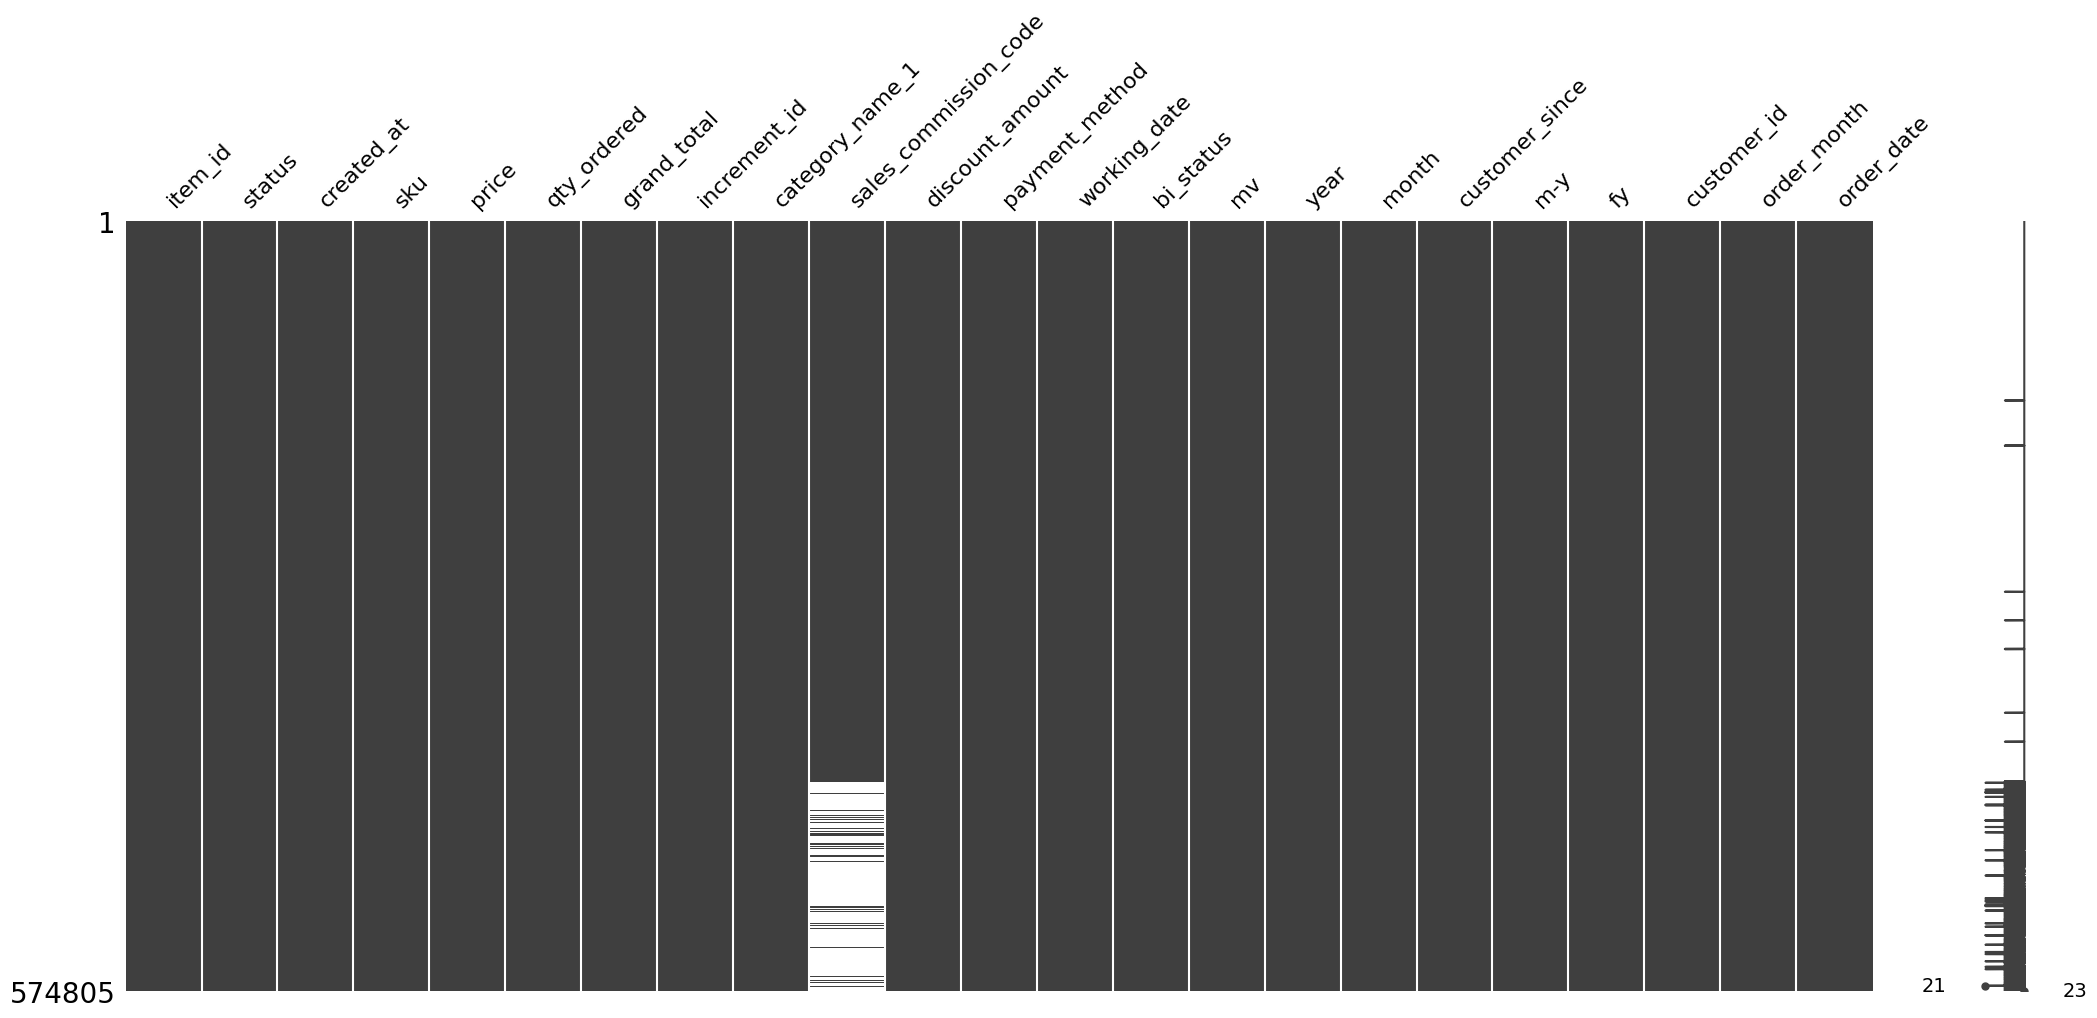

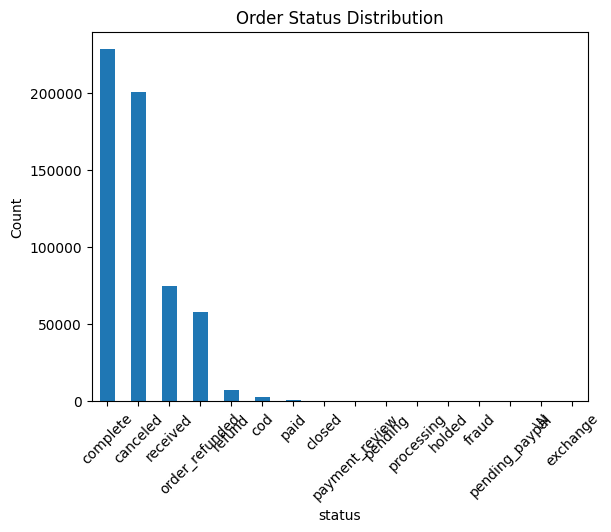

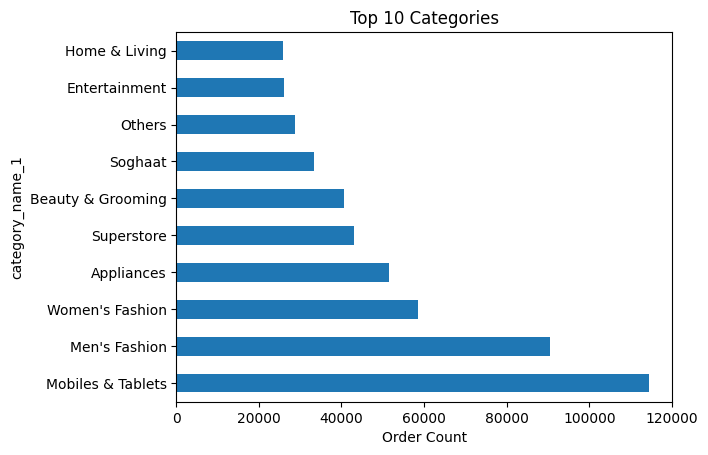

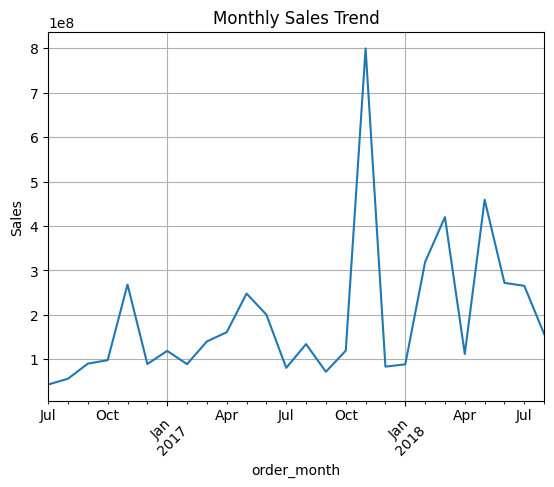

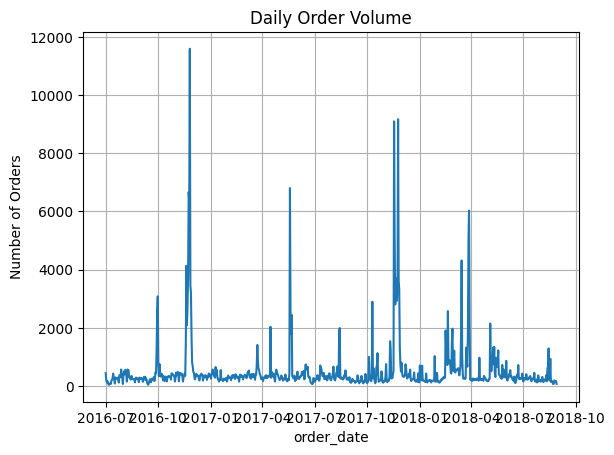


Customer Segmentation Preview:
         order_count   total_spent
count  114968.000000  1.149680e+05
mean        3.501348  4.337132e+04
std        17.578530  3.745133e+05
min         1.000000  1.000000e+00
25%         1.000000  1.340000e+03
50%         1.000000  4.900000e+03
75%         3.000000  2.189750e+04
max      2094.000000  7.215038e+07


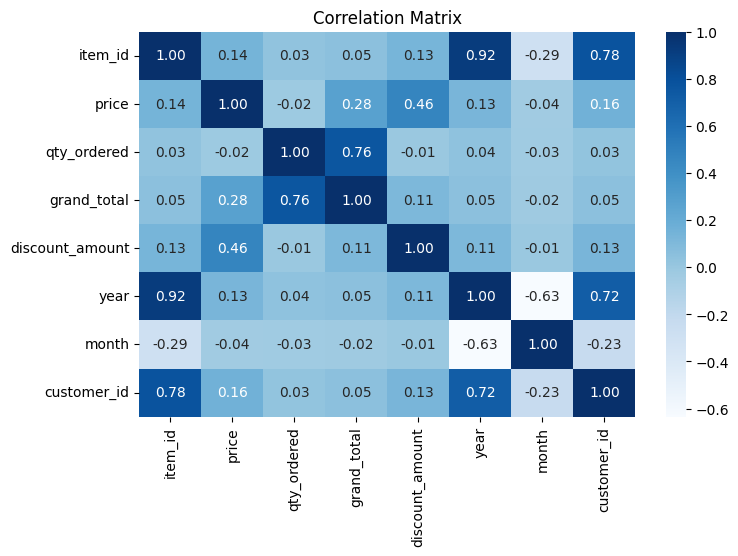

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Install required packages (if needed)
!pip install missingno seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import files

# Load data
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv", low_memory=False)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop columns with more than 50% missing
df.dropna(axis=1, thresh=len(df) * 0.5, inplace=True)

# Drop rows with missing critical values
df.dropna(subset=['increment_id', 'customer_id', 'grand_total'], inplace=True)

# Type conversion and cleaning
df['grand_total'] = pd.to_numeric(df['grand_total'].astype(str).str.replace(',', ''), errors='coerce')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df = df[df['grand_total'] > 0]
df.dropna(subset=['created_at'], inplace=True)

# Create date features
df['order_month'] = df['created_at'].dt.to_period('M')
df['order_date'] = df['created_at'].dt.date

# KPIs
total_sales = df['grand_total'].sum()
total_orders = df['increment_id'].nunique()
total_customers = df['customer_id'].nunique()
avg_order_value = df.groupby('increment_id')['grand_total'].sum().mean()

print("\nKEY KPIs:")
print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: {avg_order_value:.2f}")

# Descriptive stats
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Missing values heatmap
print("\nMissing Values Heatmap:")
msno.matrix(df)
plt.show()

# Order status distribution
if 'status' in df.columns:
    df['status'].value_counts().plot(kind='bar', title='Order Status Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Category distribution
if 'category_name_1' in df.columns:
    df['category_name_1'].value_counts().head(10).plot(kind='barh', title='Top 10 Categories')
    plt.xlabel('Order Count')
    plt.show()

# Monthly sales trend
monthly_sales = df.groupby('order_month')['grand_total'].sum()
monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Orders per day (volume trend)
orders_per_day = df.groupby('order_date')['increment_id'].nunique()
orders_per_day.plot(title='Daily Order Volume')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Customer segmentation
customer_summary = df.groupby('customer_id').agg({
    'increment_id': 'nunique',
    'grand_total': 'sum'
}).rename(columns={'increment_id': 'order_count', 'grand_total': 'total_spent'})

print("\nCustomer Segmentation Preview:")
print(customer_summary.describe())

# Correlation heatmap (numeric cols only)
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# Export cleaned dataset
df.to_csv("cleaned_ecommerce_data.csv", index=False)
files.download("cleaned_ecommerce_data.csv")
